## Import Libraries 

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


### Read the csv file


In [2]:
df = pd.read_csv('Lottery_data.csv')

In [6]:
df= df.drop(columns='Unnamed: 0')
df.head()
0

,Yellow,date,fifth,first,fourth,second,third
0,20,1/11/2019,69,4,62,5,31
1,5,1/8/2019,64,13,38,26,29
2,15,1/4/2019,60,21,54,29,35
3,14,1/1/2019,70,34,62,44,57
4,21,12/28/2018,38,9,37,10,25


In [53]:
df_count = pd.read_csv('frequency.csv')
df_count.head()

,Number,Percent,Qty
0,1,0.0165,85
1,10,0.0193,99
2,11,0.0187,96
3,12,0.0165,85
4,13,0.0144,74


### Plot the numbers vs its frequency

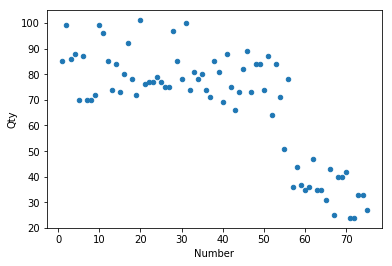

In [55]:
df_count.plot(x='Number',y='Qty',kind='scatter')

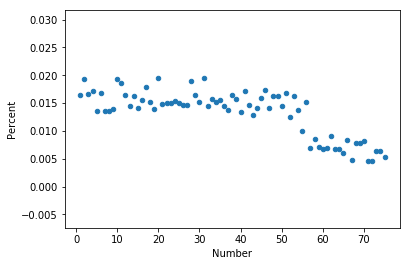

In [54]:
# Plot Numbers versus the percentage of the frequency
df_count.plot(x='Number',y='Percent',kind='scatter')

### Applying Linear Regression to fit and predict the trend line

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Training, Testing Splitting data
X_train, X_test, y_train, y_test = train_test_split(df_count['Number'],df_count['Percent'],test_size= 0.2, random_state = 1)

# Model to fit a linear line
model = LinearRegression()
model.fit((X_train[:, np.newaxis]),y_train)

#Print the model coefficients and intercept
print(f'model coefficient: {float(model.coef_)}')
print(f'model intercept: {float(model.intercept_)}')

#Predict the model
y_predict = model.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')
xfit = np.linspace(0, 75,75 )
yfit = model.predict(xfit[:, np.newaxis])

model coefficient: -0.00015004400737019273
model intercept: 0.019163867551524615
R_squared is: 0.6210029558543138


In [101]:
y_predict

array([0.01511268, 0.0182636 , 0.01631303, 0.00821066, 0.01031127,
       0.01421242, 0.01226184, 0.01856369, 0.01316211, 0.00956105,
       0.01841365, 0.01136158, 0.01751338, 0.01046132, 0.01406237])

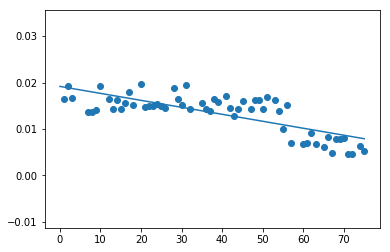

In [102]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

### Build Anova table 

In [103]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)


# X = sm.add_constant(X)
model_1 = sm.OLS(df_count['Qty'], df_count['Number'])
results = model_1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Qty   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     77.77
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           3.66e-13
Time:                        13:36:49   Log-Likelihood:                -400.03
No. Observations:                  75   AIC:                             802.1
Df Residuals:                      74   BIC:                             804.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Number         1.1753      0.133      8.819      0.0

### Build Polynomial regression model (Quadratic Model x=2)

In [119]:
model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_2.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 75,75 )
yfit = model_2.predict(xfit[:, np.newaxis])
print(f'model coefficient: {float(model.coef_)}')
print(f'model intercept: {float(model.intercept_)}')
y_predict = model_2.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: -0.00015004400737019273
model intercept: 0.019163867551524615
R_squared is: 0.7401174704243572


### Predict the numbers probability 


In [140]:
print(model_2.predict(np.array(75)))
df_count[df_count['Number'] == 75]
y_predict[:]
df_count['Percent'].sum()

[0.00425091]


0.9999699999999999

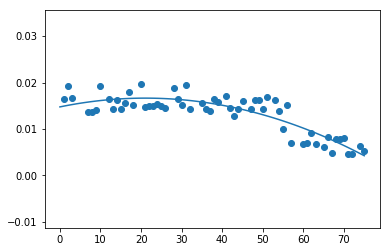

In [105]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

### Build Ridge Regression Model with an alpha=0.1

In [94]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train[:, np.newaxis],y_train)
xfit = np.linspace(0, 1,1000 )
yfit = model_ridge.predict(xfit[:, np.newaxis])
print(f'model coefficient: {float(model.coef_)}')
print(f'model intercept: {float(model.intercept_)}')
y_predict = model_ridge.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: -0.770982311899745
model intercept: 98.49846635492514
R_squared is: 0.6231483051980649
